# Лабораторная работа №1 
### АНАЛИЗ ТИПОВЫХ ЗВЕНЬЕВ АСР

### Аннотация

Цель любого управления – изменить состояние объекта нужным образом. Поэтому необходимо понимать, как построить регулятор, который может управлять данным объектом так, чтобы достичь поставленной цели. Для этого разработчику необходимо знать, как система управления будет реагировать на разные воздействия, то есть нужна модель системы: объекта, привода, датчиков, каналов связи, возмущений, шумов. При этом для упрощения анализа и синтеза САУ все эти элементы объединяются в типовые звенья по единству их математического описания.

#### Цель работы: 
Создание программы для изучения моделей и характеристик основных типовых динамических звеньев систем управления. 

#### Исходные данные
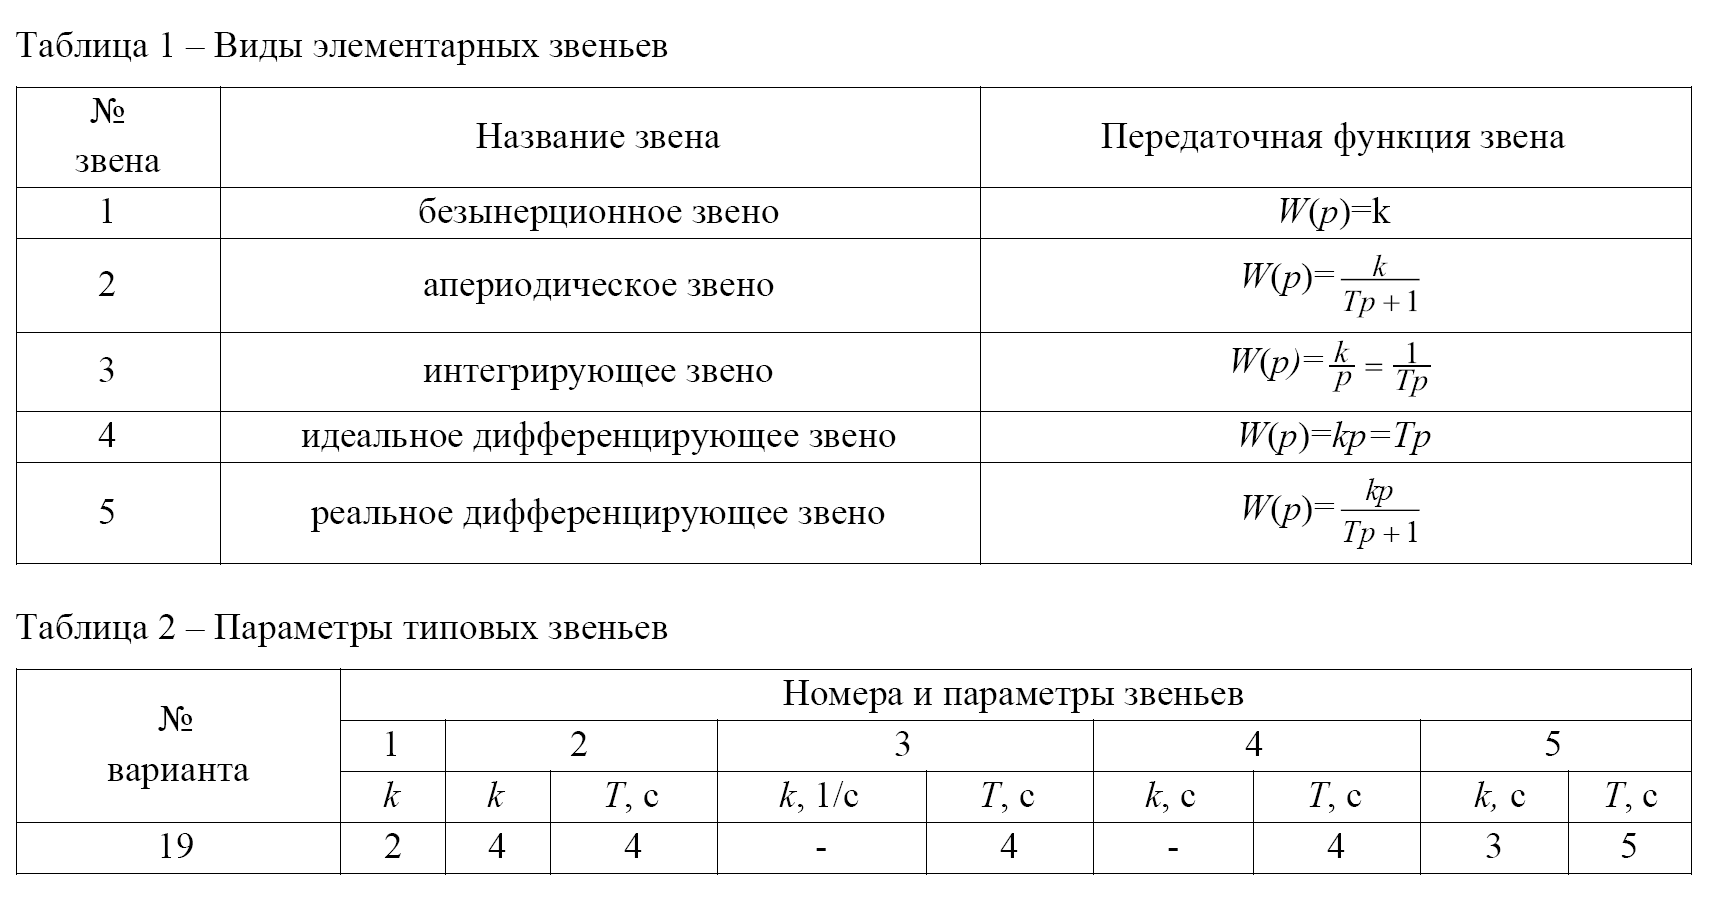

Задание:
1.	Провести экспериментальное исследование типовых звеньев. Снять переходную, импульсную и частотные характеристики (АЧХ и ФЧХ). Полученные частотные характеристики зарисовать.
2.	Изменить числовые характеристики звеньев, уменьшив k в два раза и увеличить T в два раза, повторить п.1.
3.  По результатам проведенных исследований сделать выводы о влиянии числовых параметров на статические и динамические характеристики звеньев.

In [1]:
import matplotlib.pyplot as plt
import numpy, sympy
import time
import control as crt
from control.matlab import step as st

len_t=20

In [19]:
def get_step_imp_bode(num, dem):
    sys = crt.tf(num, dem) #get Transmission function
    len_t=20 #time of 'simulation'
    
    subtitle='Analyze Transmission function with parameters num = '+str(num)+', dem = '+str(dem)
    fig=plt.figure()
    fig.suptitle(subtitle, fontsize=16)
    fig.set_figheight(10)
    fig.set_figwidth(14)
    
    t= [i for i in range(len_t)]
    # Start step
    h,t_=crt.matlab.step(sys,t,0)
    
    # Plot step
    plt.subplot(221)
    plt.plot(t_,h, 'g--', linewidth=2, markersize=12)
    plt.title('transfer function h(t)')
    plt.grid(True)
    plt.xlabel('t,c')
    plt.ylabel('h(t)')
    #plt.legend(loc = 'best')

    #Start impulse
    w,t_=crt.matlab.impulse(sys,t,0)
    
    #Plot impulse
    plt.subplot(222)
    plt.plot(t_,w)
    plt.title('impulse function w(t)')
    plt.grid(True)
    plt.xlabel('t,c')
    plt.ylabel('w(t)')
    #plt.legend(loc = 'best')

    plt.show()
    
    #Start and plot bode
    mag, phase, omega = crt.matlab.bode(sys, dB=False)
    

## 1. Исследование безынерционного звена
$W(p) = k,  k = (2; 1)$

In [20]:
k=[2, 1]

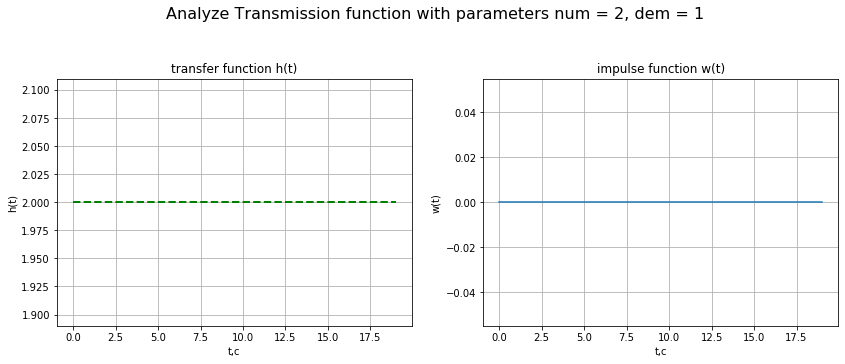

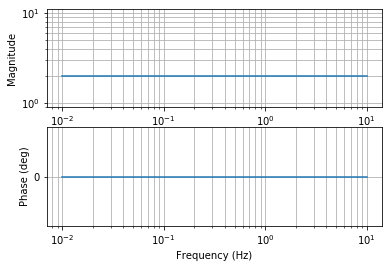

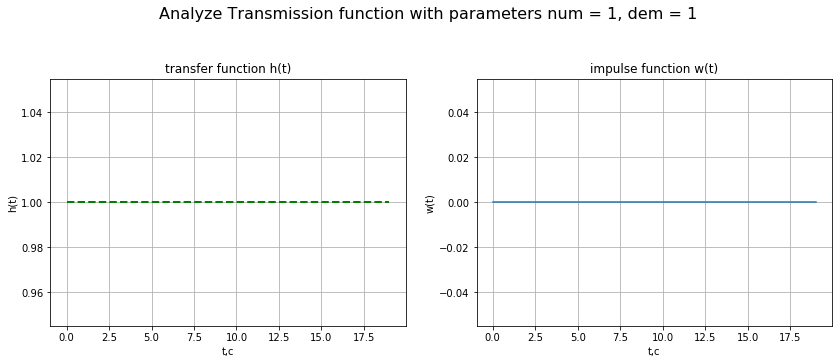

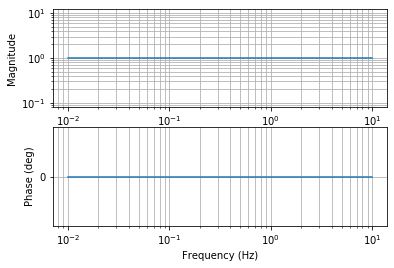

In [21]:
for i in range(len(k)):
    #print('For k= ', k[i])
    num=k[i]
    dem=1
    get_step_imp_bode(num, dem)

## 2. Исследование апериодического звена
$W(p) = \frac{k}{Tp+1},  k = (4; 2),  T = (4; 8)$

In [22]:
k=[4, 2]
T=[4, 8]

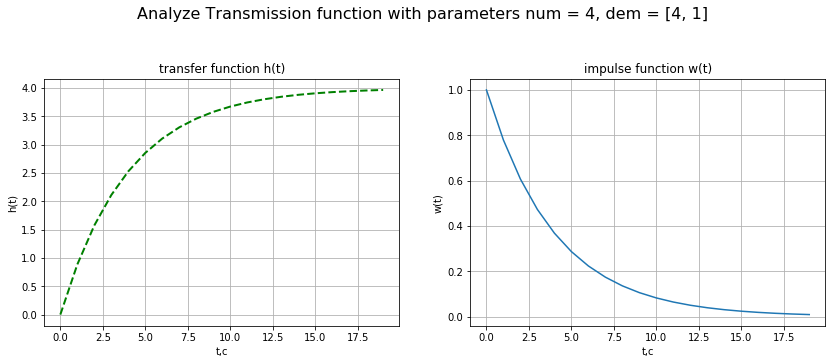

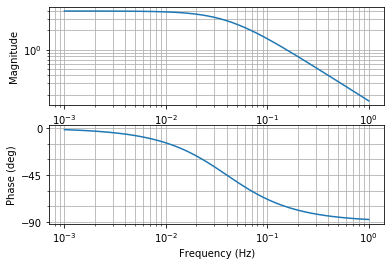

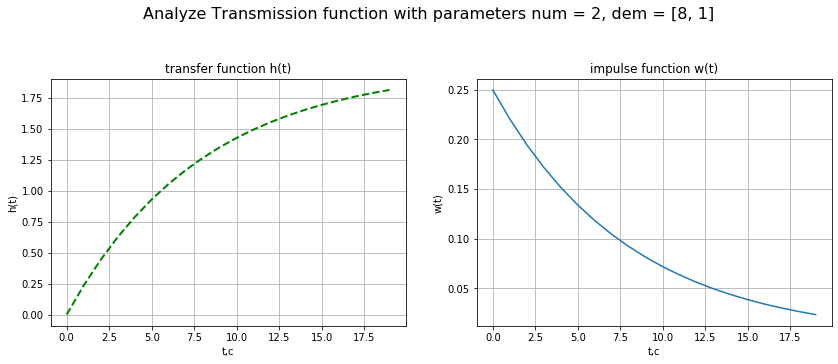

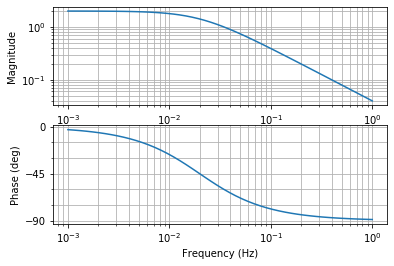

In [23]:
for i in range(len(k)):
    #print('For k= ', k[i])
    num=k[i]
    dem=[T[i],1]
    get_step_imp_bode(num, dem)

## 3. Исследование интегрирующего звена
$W(p) = \frac{1}{Tp}, T = (4; 8)$

In [24]:
k=[1, 1]
T=[4, 8]

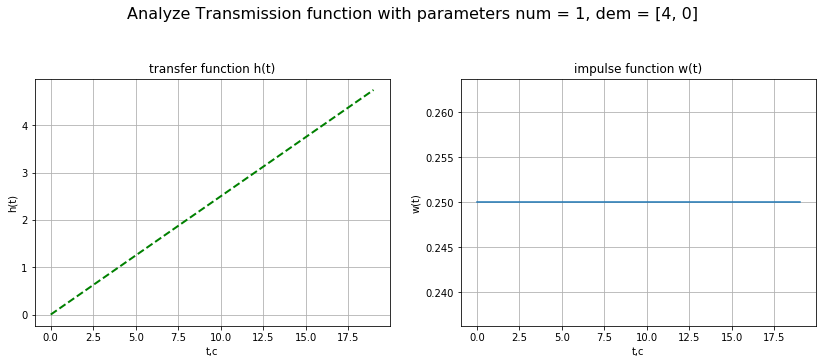

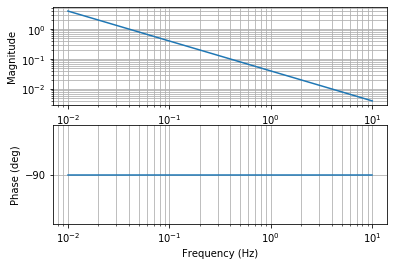

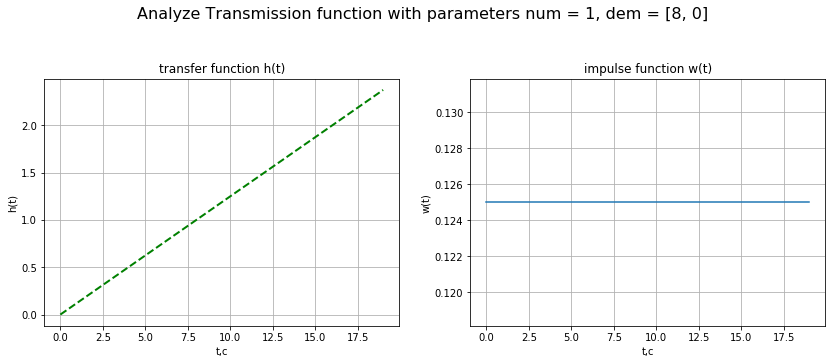

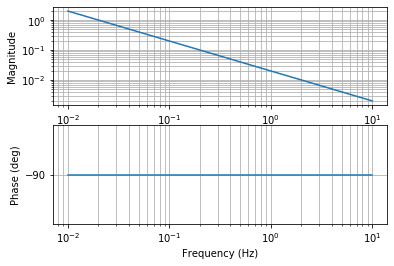

In [25]:
for i in range(len(k)):
    #print('For k= ', k[i])
    num=k[i]
    dem=[T[i],0]
    get_step_imp_bode(num, dem)

## 4. Исследование идеального дифференциирующего звена
$W(p) = {Tp}, T = (4; 8)$

In [26]:
T=[4, 8]

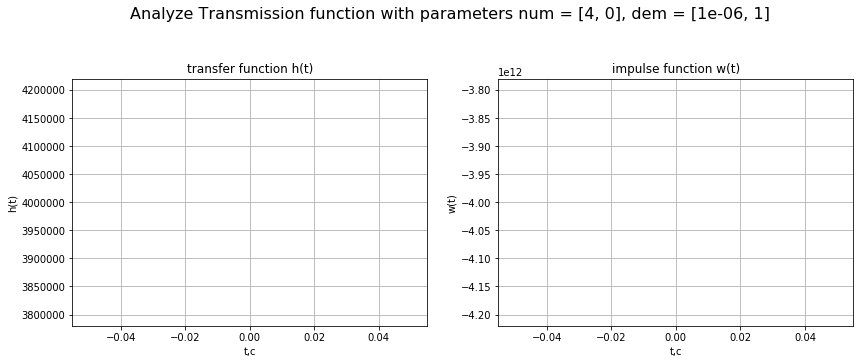

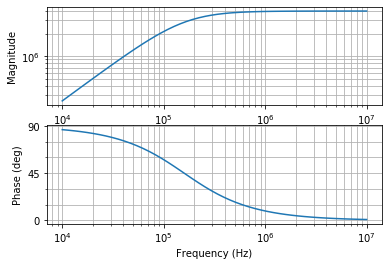

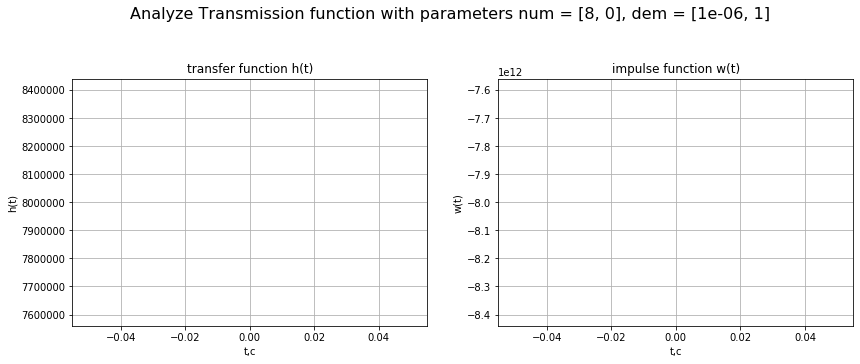

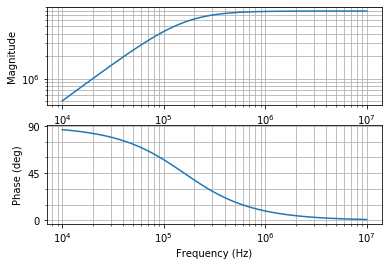

In [27]:
for i in range(len(T)):
    #print('For k= ', k[i])
    num=[T[i],0]
    dem=[1e-6,1] 
    get_step_imp_bode(num, dem)
    """
    sys = crt.tf(num, dem)
    fig=plt.figure()
    fig.suptitle('Plot of the frequency response')
    mag, phase, omega = crt.matlab.bode(sys)
    """

## 5. Исследование реального дифференциирующего звена 
$W(p) = \frac{kp}{Tp+1}, k =(3; 1.5), T = (5; 10)$

In [28]:
k=[3, 1.5]
T=[5, 10]

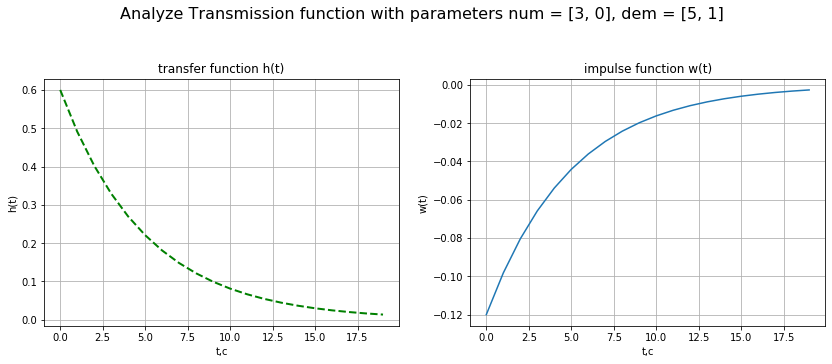

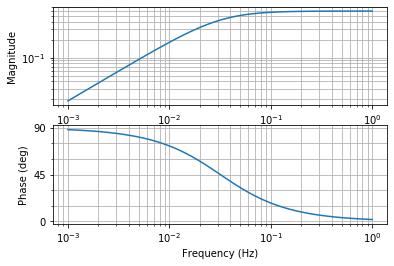

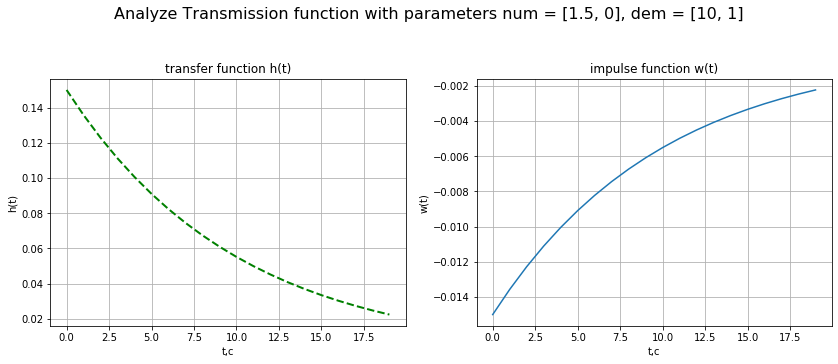

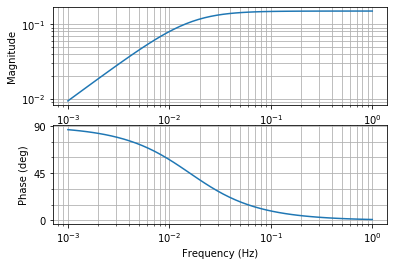

In [29]:
for i in range(len(k)):
    #print('For k= ', k[i])
    num=[k[i],0]
    dem=[T[i], 1]
    get_step_imp_bode(num, dem)